In [395]:
import pandas as pd
import numpy as np

f = pd.read_excel("flowrate.xlsx",usecols="A:G")
df = pd.DataFrame(f)
df

,Temperature,Pressure,Specific Gravity,ΔP,(ΔP)^0.5,Viscosity,qv
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,65.0,15.0,0.8950,11.34225,3.367826,22.31,31038.749558
2,22.0,18.0,0.8965,8.37225,2.893484,127.60,28742.518094
3,65.0,16.0,0.8975,8.83600,2.972541,22.31,27419.351077
4,70.0,13.0,0.8975,8.28100,2.877673,19.80,26476.381406
...,...,...,...,...,...,...,...
1033,97.0,65.0,0.8870,163.21600,12.775602,15.73,115467.655851
1034,96.0,67.0,0.8880,163.21600,12.775602,15.97,115439.798234
1035,97.0,65.0,0.8885,164.43025,12.823036,15.73,115799.997339
1036,97.0,67.0,0.8890,164.83600,12.838847,15.73,115911.442927


In [396]:
df.drop(0,axis=0,inplace=True)

In [397]:
df['velocity'] = df['qv']/((3.1415 * pow(0.21336,2))/4)

In [398]:
df['Re'] = (df['Specific Gravity']*df['velocity']*0.4445)/df['Viscosity']
df

,Temperature,Pressure,Specific Gravity,ΔP,(ΔP)^0.5,Viscosity,qv,velocity,Re
1,65.0,15.0,0.8950,11.34225,3.367826,22.31,31038.749558,8.681627e+05,15480.905835
2,22.0,18.0,0.8965,8.37225,2.893484,127.60,28742.518094,8.039365e+05,2510.690158
3,65.0,16.0,0.8975,8.83600,2.972541,22.31,27419.351077,7.669271e+05,13713.892679
4,70.0,13.0,0.8975,8.28100,2.877673,19.80,26476.381406,7.405520e+05,14920.953705
5,67.0,11.0,0.8970,13.11025,3.620808,21.24,33252.721966,9.300882e+05,17459.581072
...,...,...,...,...,...,...,...,...,...
1033,97.0,65.0,0.8870,163.21600,12.775602,15.73,115467.655851,3.229663e+06,80951.319771
1034,96.0,67.0,0.8880,163.21600,12.775602,15.97,115439.798234,3.228884e+06,79805.403156
1035,97.0,65.0,0.8885,164.43025,12.823036,15.73,115799.997339,3.238959e+06,81321.605874
1036,97.0,67.0,0.8890,164.83600,12.838847,15.73,115911.442927,3.242076e+06,81445.677023


In [399]:
import pandas as pd

cutoff = [0,2000,4000,100000]
labels = ['laminar','transition','turbulent']
df['Nature of flow'] = pd.cut(df['Re'],bins=cutoff,labels=labels)
df

,Temperature,Pressure,Specific Gravity,ΔP,(ΔP)^0.5,Viscosity,qv,velocity,Re,Nature of flow
1,65.0,15.0,0.8950,11.34225,3.367826,22.31,31038.749558,8.681627e+05,15480.905835,turbulent
2,22.0,18.0,0.8965,8.37225,2.893484,127.60,28742.518094,8.039365e+05,2510.690158,transition
3,65.0,16.0,0.8975,8.83600,2.972541,22.31,27419.351077,7.669271e+05,13713.892679,turbulent
4,70.0,13.0,0.8975,8.28100,2.877673,19.80,26476.381406,7.405520e+05,14920.953705,turbulent
5,67.0,11.0,0.8970,13.11025,3.620808,21.24,33252.721966,9.300882e+05,17459.581072,turbulent
...,...,...,...,...,...,...,...,...,...,...
1033,97.0,65.0,0.8870,163.21600,12.775602,15.73,115467.655851,3.229663e+06,80951.319771,turbulent
1034,96.0,67.0,0.8880,163.21600,12.775602,15.97,115439.798234,3.228884e+06,79805.403156,turbulent
1035,97.0,65.0,0.8885,164.43025,12.823036,15.73,115799.997339,3.238959e+06,81321.605874,turbulent
1036,97.0,67.0,0.8890,164.83600,12.838847,15.73,115911.442927,3.242076e+06,81445.677023,turbulent


In [400]:
df.head()

,Temperature,Pressure,Specific Gravity,ΔP,(ΔP)^0.5,Viscosity,qv,velocity,Re,Nature of flow
1,65.0,15.0,0.8950,11.34225,3.367826,22.31,31038.749558,868162.731801,15480.905835,turbulent
2,22.0,18.0,0.8965,8.37225,2.893484,127.60,28742.518094,803936.478833,2510.690158,transition
3,65.0,16.0,0.8975,8.83600,2.972541,22.31,27419.351077,766927.117686,13713.892679,turbulent
4,70.0,13.0,0.8975,8.28100,2.877673,19.80,26476.381406,740551.985405,14920.953705,turbulent
5,67.0,11.0,0.8970,13.11025,3.620808,21.24,33252.721966,930088.175357,17459.581072,turbulent


In [415]:
df.tail()

,Temperature,Pressure,Specific Gravity,ΔP,(ΔP)^0.5,Viscosity,qv,velocity,Re,Nature of flow
1033,0.813725,0.257624,0.8870,0.954566,0.97663,0.017359,0.969716,0.969716,0.993859,turbulent
1034,0.803922,0.265650,0.8880,0.954566,0.97663,0.018204,0.969477,0.969477,0.979625,turbulent
1035,0.813725,0.257624,0.8885,0.961669,0.98032,0.017359,0.972561,0.972561,0.998459,turbulent
1036,0.813725,0.265650,0.8890,0.964043,0.98155,0.017359,0.973515,0.973515,1.000000,turbulent
1037,0.813725,0.277689,0.8850,0.935751,0.96679,0.017359,0.961060,0.961060,0.982807,turbulent


In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 1 to 1037
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Temperature       1037 non-null   float64 
 1   Pressure          1037 non-null   float64 
 2   Specific Gravity  1037 non-null   float64 
 3   ΔP                1037 non-null   float64 
 4   (ΔP)^0.5          1037 non-null   float64 
 5   Viscosity         1037 non-null   float64 
 6   qv                1037 non-null   float64 
 7   velocity          1037 non-null   float64 
 8   Re                1037 non-null   float64 
 9   Nature of flow    1037 non-null   category
dtypes: category(1), float64(9)
memory usage: 74.2 KB


In [417]:
df.describe()

,Temperature,Pressure,Specific Gravity,ΔP,(ΔP)^0.5,Viscosity,qv,velocity,Re
count,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000
mean,0.720650,0.119399,0.893786,0.342712,0.469039,0.028234,0.467652,0.467652,0.429343
std,0.104670,0.102063,0.004922,0.349382,0.344206,0.048905,0.340875,0.340875,0.311614
min,0.000000,0.000000,0.882000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.637255,0.065008,0.891500,0.022566,0.136531,0.014859,0.137953,0.137953,0.135836
50%,0.725490,0.077047,0.893500,0.118510,0.333333,0.026126,0.331993,0.331993,0.316114
75%,0.813725,0.161316,0.896500,0.704135,0.836408,0.037534,0.829089,0.829089,0.745798
max,1.000000,1.000000,0.995700,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [418]:
df.isnull().sum()

Temperature         0
Pressure            0
Specific Gravity    0
ΔP                  0
(ΔP)^0.5            0
Viscosity           0
qv                  0
velocity            0
Re                  0
Nature of flow      0
dtype: int64

In [419]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

mm = MinMaxScaler()
df[['Temperature','Pressure','ΔP','(ΔP)^0.5','Viscosity','qv','velocity','Re']] = mm.fit_transform(df[['Temperature','Pressure','ΔP','(ΔP)^0.5','Viscosity','qv','velocity','Re']])
df[['Temperature','Pressure','ΔP','(ΔP)^0.5','Viscosity','qv','velocity','Re']]

,Temperature,Pressure,ΔP,(ΔP)^0.5,Viscosity,qv,velocity,Re
1,0.500000,0.056982,0.066068,0.244772,0.040527,0.246929,0.246929,0.180613
2,0.078431,0.069021,0.048693,0.207872,0.411253,0.227271,0.227271,0.019503
3,0.500000,0.060995,0.051406,0.214022,0.040527,0.215944,0.215944,0.158664
4,0.549020,0.048957,0.048159,0.206642,0.031689,0.207871,0.207871,0.173658
5,0.519608,0.040931,0.076411,0.264453,0.036759,0.265883,0.265883,0.205191
...,...,...,...,...,...,...,...,...
1033,0.813725,0.257624,0.954566,0.976630,0.017359,0.969716,0.969716,0.993859
1034,0.803922,0.265650,0.954566,0.976630,0.018204,0.969477,0.969477,0.979625
1035,0.813725,0.257624,0.961669,0.980320,0.017359,0.972561,0.972561,0.998459
1036,0.813725,0.265650,0.964043,0.981550,0.017359,0.973515,0.973515,1.000000


In [420]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df.drop('Nature of flow',axis=1),df['Nature of flow'],test_size=.2,random_state=10)
x_train

,Temperature,Pressure,Specific Gravity,ΔP,(ΔP)^0.5,Viscosity,qv,velocity,Re
511,0.627451,0.065008,0.8965,0.022566,0.136531,0.039013,0.138272,0.138272,0.104407
86,0.833333,0.069021,0.8940,0.019056,0.124231,0.001866,0.123623,0.123623,0.191031
164,0.715686,0.085072,0.8935,0.015532,0.110701,0.011091,0.111085,0.111085,0.138379
694,0.823529,0.081059,0.8970,0.700080,0.833948,0.016478,0.823708,0.823708,0.868994
1014,0.774510,0.265650,0.8900,0.935751,0.966790,0.020985,0.959544,0.959544,0.925510
...,...,...,...,...,...,...,...,...,...
491,0.686275,0.065008,0.8990,0.029621,0.158672,0.030809,0.159436,0.159436,0.136163
257,0.617647,0.060995,0.8970,0.023676,0.140221,0.040527,0.142010,0.142010,0.104945
1033,0.813725,0.257624,0.8870,0.954566,0.976630,0.017359,0.969716,0.969716,0.993859
734,0.862745,0.073034,0.8975,0.565554,0.747847,0.013274,0.737893,0.737893,0.829160


In [421]:
y_train

511     turbulent
86      turbulent
164     turbulent
694     turbulent
1014    turbulent
          ...    
491     turbulent
257     turbulent
1033    turbulent
734     turbulent
528     turbulent
Name: Nature of flow, Length: 829, dtype: category
Categories (3, object): ['laminar' < 'transition' < 'turbulent']

In [422]:
from sklearn.neural_network import MLPClassifier
import numpy as np

mlp = MLPClassifier(hidden_layer_sizes=(100,100),activation='tanh',max_iter=100)

In [423]:
mlp.fit(x_train,y_train)

C:\Users\ALLA MAHESH PRAMODH\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 100), max_iter=100)

In [424]:
y_pred = mlp.predict(x_test)
y_pred

array(['turbulent', 'turbulent', 'turbulent', 'turbulent', 'turbulent',
       'turbulent', 'turbulent', 'turbulent', 'turbulent', 'turbulent',
       'turbulent', 'turbulent', 'turbulent', 'turbulent', 'turbulent',
       'turbulent', 'turbulent', 'turbulent', 'turbulent', 'turbulent',
       'turbulent', 'turbulent', 'turbulent', 'turbulent', 'turbulent',
       'turbulent', 'turbulent', 'turbulent', 'turbulent', 'turbulent',
       'turbulent', 'turbulent', 'turbulent', 'turbulent', 'turbulent',
       'turbulent', 'turbulent', 'turbulent', 'turbulent', 'turbulent',
       'turbulent', 'turbulent', 'turbulent', 'turbulent', 'turbulent',
       'turbulent', 'turbulent', 'turbulent', 'turbulent', 'turbulent',
       'turbulent', 'turbulent', 'turbulent', 'turbulent', 'turbulent',
       'turbulent', 'turbulent', 'turbulent', 'turbulent', 'turbulent',
       'turbulent', 'turbulent', 'turbulent', 'turbulent', 'turbulent',
       'turbulent', 'turbulent', 'turbulent', 'turbulent', 'turb

In [425]:
from sklearn.metrics import classification_report,accuracy_score

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

  transition       1.00      1.00      1.00         2
   turbulent       1.00      1.00      1.00       206

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208

1.0


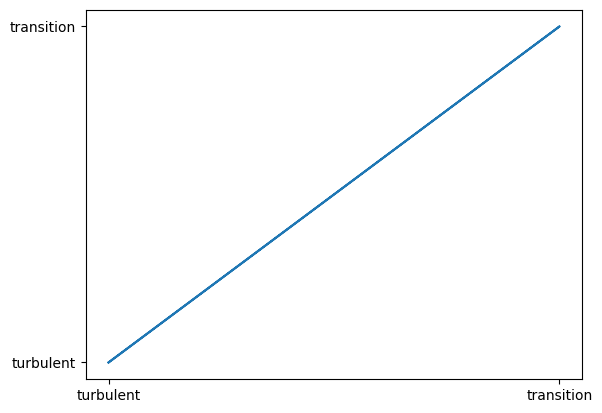

In [426]:
import matplotlib.pyplot as plt

plt.plot(y_test,y_pred)

In [454]:
df.loc[[5,6]]

,Temperature,Pressure,Specific Gravity,ΔP,(ΔP)^0.5,Viscosity,qv,velocity,Re,Nature of flow
5,0.519608,0.040931,0.897,0.076411,0.264453,0.036759,0.265883,0.265883,0.205191,turbulent
6,0.519608,0.032905,0.897,0.001505,0.025830,0.036759,0.027438,0.027438,0.023535,transition


In [461]:
from sklearn.neural_network import MLPClassifier
import numpy as np

mlp = MLPClassifier(hidden_layer_sizes=(100,100),activation='tanh',max_iter=100)
mlp.fit(x_train,y_train)
pred = mlp.predict(df.drop('Nature of flow',axis=1).loc[[5,6]])
pred

C:\Users\ALLA MAHESH PRAMODH\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


array(['turbulent', 'transition'], dtype='<U10')

In [462]:
if df.loc[5,'Nature of flow'] == pred[0]:
    print("correct prediction..")
else:
    print("wrong prediction")

correct prediction..


In [464]:
if df.loc[6,'Nature of flow'] == pred[1]:
    print("correct prediction..")
else:
    print("wrong prediction")

correct prediction..
